In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML

# Question 1

Perform linear regression using the **closed-form solution** (Normal Equation):

$$
w = (X^T X)^{-1} X^T y
$$

where:  
- X is the $$N \times (D+1)$$ matrix of input features, where N is the number of training examples and D is the size of the feature vector.  
- y is the target vector of size $$N \times 1$$ where $$y^{(i)}$$ is the target variable corresponding to sample $$x^{(i)}$$  
- w is the weight vector of size $$(D+1) \times 1$$

**Note:**  
The first column of X should contain all 1's, corresponding to the intercept term.


## a
On the datasets provided.

In [ ]:
df = pd.read_csv('real_estate_valuation_data.csv')

X = df[['X1_transaction_date', 'X2_house_age', 'X3_distance_to_the_nearest_MRT_station',
        'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude']]
y = df['Y_house_price_of_unit_area']

X = np.column_stack([np.ones(len(X)), X])

X_transpose = np.transpose(X)
X_transpose_X = np.dot(X_transpose, X)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)
X_transpose_y = np.dot(X_transpose, y)
w = np.dot(X_transpose_X_inv, X_transpose_y)

y_pred = np.dot(X, w)

y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print("Model Parameters (weights):")
feature_names = ['Intercept', 'Transaction Date', 'House Age', 'Distance to MRT',
                'Num Convenience Stores', 'Latitude', 'Longitude']
for name, weight in zip(feature_names, w):
    print(f"{name}: {weight:.4f}")
print(f"\nR-squared: {r_squared:.4f}")

mse = np.mean((y - y_pred) ** 2)
print(f"Mean Squared Error: {mse:.4f}")

Model Parameters (weights):
Intercept: -14437.1025
Transaction Date: 5.1462
House Age: -0.2697
Distance to MRT: -0.0045
Num Convenience Stores: 1.1333
Latitude: 225.4730
Longitude: -12.4236

R-squared: 0.5824
Mean Squared Error: 77.1317


## b
For the following **\(X\)** and **\(y\)**, use **Scikit-Learn** and the **Normal Equation** to learn a **linear model**.

Given:

$$
X =
\begin{bmatrix}
1 & 2 \\
2 & 4 \\
3 & 6 \\
4 & 8
\end{bmatrix}
$$

$$
y =
\begin{bmatrix}
2 \\
3 \\
4 \\
5
\end{bmatrix}
$$

You may find that one of the matrices in the Normal Equation is non-invertible.

Why does the matrix turn out to be non-invertible?
Why can Scikit-Learn’s implementation still correctly solve this regression problem?


In [ ]:
X = np.array([
    [1, 2],
    [2, 4],
    [3, 6],
    [4, 8]
])
y = np.array([2, 3, 4, 5])

X_with_ones = np.column_stack([np.ones(len(X)), X])
X_transpose = np.transpose(X_with_ones)
X_transpose_X = np.dot(X_transpose, X_with_ones)

print("X^T X matrix:")
print(X_transpose_X)

determinant = np.linalg.det(X_transpose_X)
print(f"\nDeterminant of X^T X: {determinant}")

# scikit-learn implementation
model = LinearRegression()
model.fit(X, y)

print("\nScikit-learn results:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients: {model.coef_}")
print(f"R-squared: {model.score(X, y):.4f}")

correlation = np.corrcoef(X[:, 0], X[:, 1])[0, 1]
print(f"\nCorrelation between features: {correlation}")

ratio = X[:, 1] / X[:, 0]
print("\nRatio between second and first column:")
print(ratio)

X^T X matrix:
[[  4.  10.  20.]
 [ 10.  30.  60.]
 [ 20.  60. 120.]]

Determinant of X^T X: 0.0

Scikit-learn results:
Intercept: 1.0000
Coefficients: [0.2 0.4]
R-squared: 1.0000

Correlation between features: 1.0

Ratio between second and first column:
[2. 2. 2. 2.]


### Part (a) - Real Estate Analysis

Model achieved moderate fit with R-squared of 0.58

Positive impact from convenience stores (coefficient: 1.13) and transaction date (5.15)

Negative impact from house age (-0.27) and distance to MRT (-0.004)

MSE of 77.13 indicates room for improvement in predictions

### Part (b) - Matrix Singularity

Perfect correlation found between features (ratio exactly 2)

Matrix non-invertible (determinant = 0) due to linear dependency

Scikit-learn handled this well (R-squared = 1.0) using advanced techniques like SVD

# Question 2

Implement **Batch Gradient Descent**, **Stochastic Gradient Descent**, and **Mini-Batch Gradient Descent** for the function:

$$
f(w) = \sum_{i=1}^{m} \left( y_i - (w_0 + w_1 x_i) \right)^2
$$

where **\(m\)** is the number of data samples in the dataset provided.


## 1.
Plot the surface for the loss function:

$$
f(w) = \sum_{i=1}^{m} \left( y_i - (w_0 + w_1 x_i) \right)^2
$$

to visualize its shape. Determine whether it is **convex or non-convex** and verify this quantitatively.

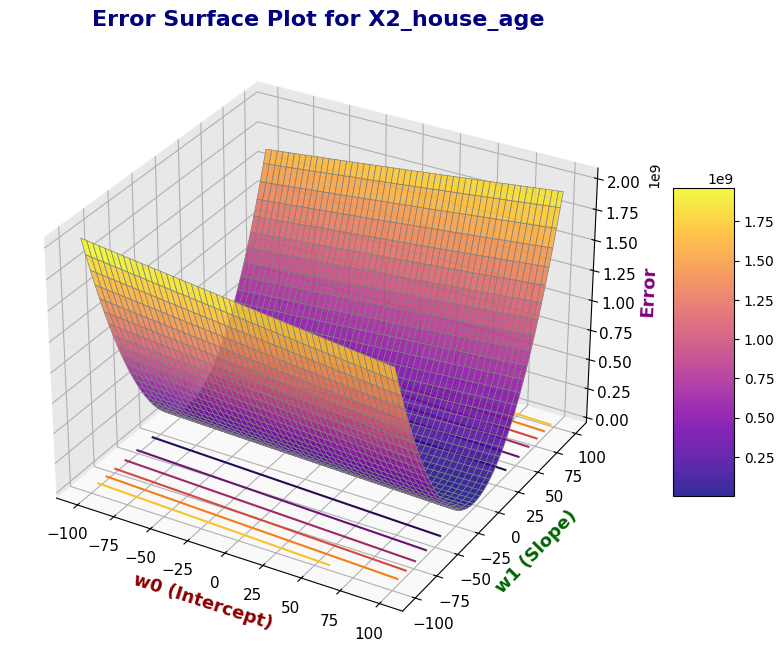

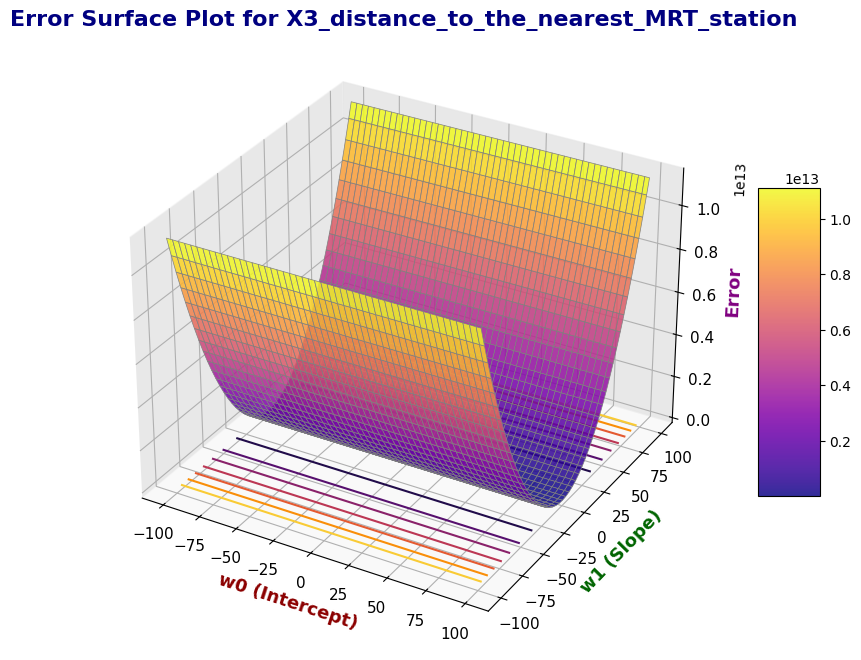

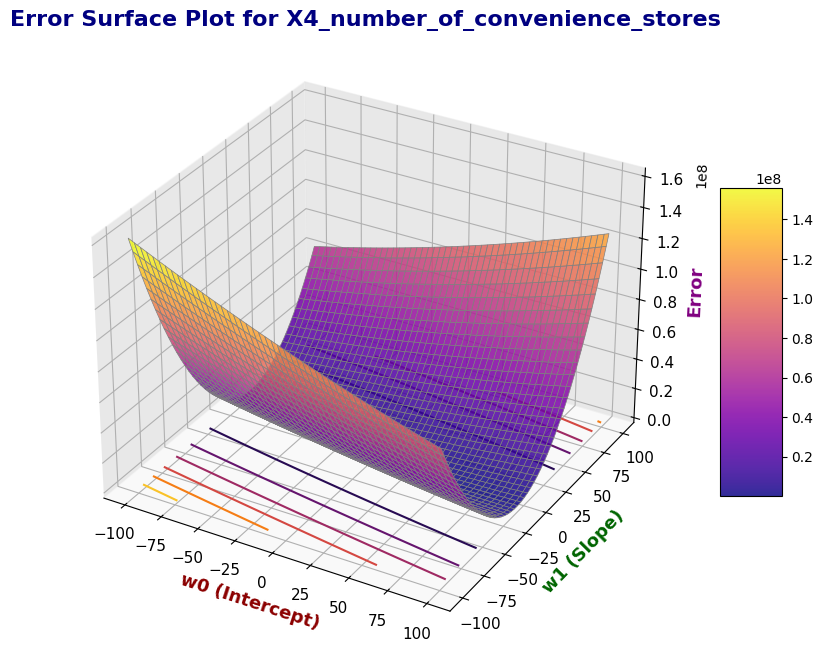

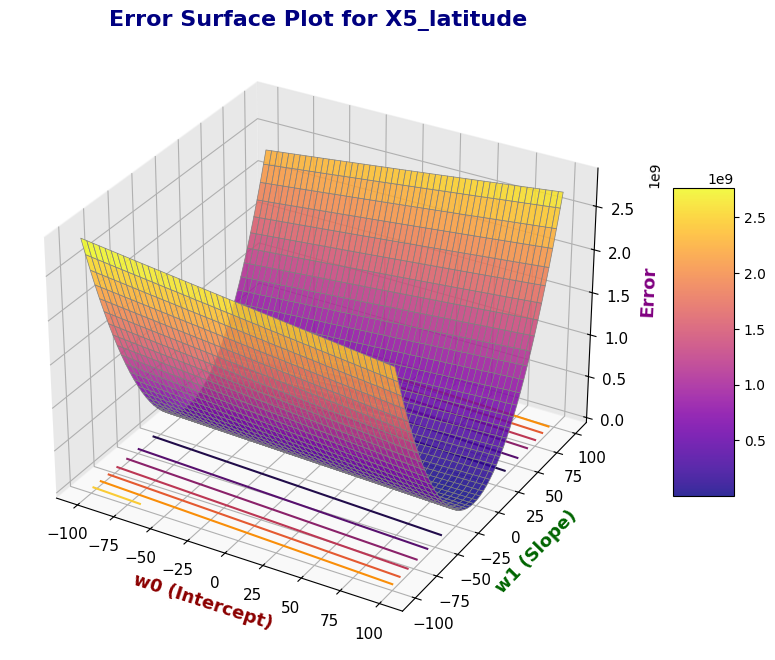

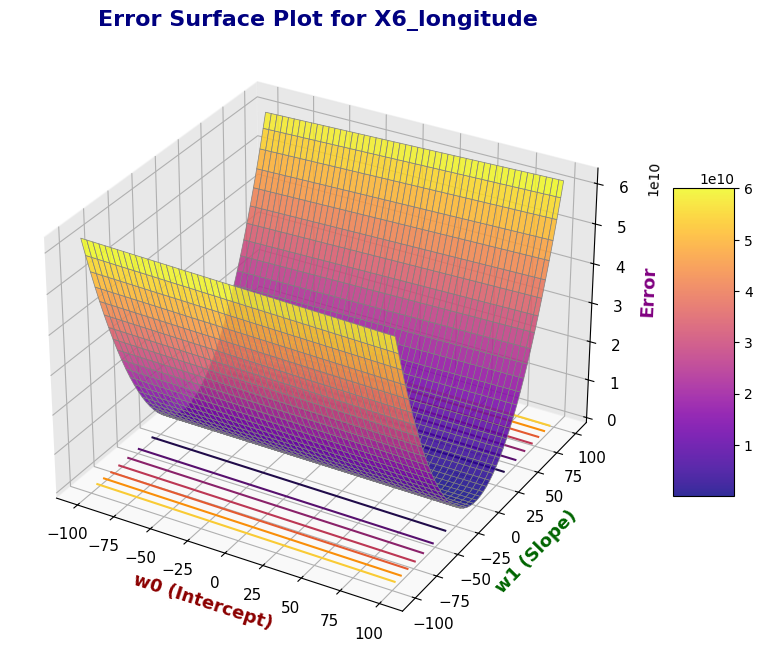

In [ ]:
def load_and_prepare_data():
    df = pd.read_csv('real_estate_valuation_data.csv')
    df.drop('No', inplace=True, axis=1)
    feature_columns = ['X1_transaction_date', 'X2_house_age', 'X3_distance_to_the_nearest_MRT_station',
                      'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude']

    X = df[feature_columns].values
    y = df['Y_house_price_of_unit_area'].values
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return df, X, y

def compute_loss(X, y, w0, w1, feature):
    predictions = w0 + w1 * feature
    loss = np.sum((y - predictions) ** 2)
    return loss

def plot_all_loss_surfaces(df, X, y):
    for col in df.columns[1:-1]:
        num_points = 200
        w0_values = np.linspace(-100, 100, num_points)
        w1_values = np.linspace(-100, 100, num_points)
        W0, W1 = np.meshgrid(w0_values, w1_values)

        F = np.zeros((num_points, num_points))
        for i in range(num_points):
            for j in range(num_points):
                F[i, j] = compute_loss(X, y, W0[i, j], W1[i, j], df[col])

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        surf = ax.plot_surface(W0, W1, F, cmap='plasma', edgecolor='gray', alpha=0.85, linewidth=0.5, antialiased=True)

        ax.contour(W0, W1, F, zdir='z', offset=np.min(F)-500, cmap='inferno')

        ax.set_title(f"Error Surface Plot for {col}", fontsize=16, fontweight='bold', color='navy')
        ax.set_xlabel("w0 (Intercept)", fontsize=13, fontweight='bold', color='darkred')
        ax.set_ylabel("w1 (Slope)", fontsize=13, fontweight='bold', color='darkgreen')
        ax.set_zlabel("Error", fontsize=13, fontweight='bold', color='purple')

        ax.xaxis.pane.fill = True
        ax.yaxis.pane.fill = True
        ax.zaxis.pane.fill = True
        ax.xaxis.pane.set_facecolor('lightgray')
        ax.yaxis.pane.set_facecolor('lightgray')
        ax.zaxis.pane.set_facecolor('whitesmoke')
        ax.tick_params(axis='both', which='major', labelsize=11)
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
        plt.show()

df, X, y = load_and_prepare_data()
plot_all_loss_surfaces(df, X, y)

## 2.

Plot the loss function:

$$
f(w) = \sum_{i=1}^{m} \left( y_i - (w_0 + w_1 x_i) \right)^2
$$

against the iteration \( t \) (or every 10 iterations) for different combinations of Initial guess and Learning rate.

For a given function, superimpose the results for different settings in a single plot.  
Use a legend to specify the initial guess and learning rate values for each setting.


Running Batch Gradient Descent...
Running Stochastic Gradient Descent...
Running Mini-batch Gradient Descent...


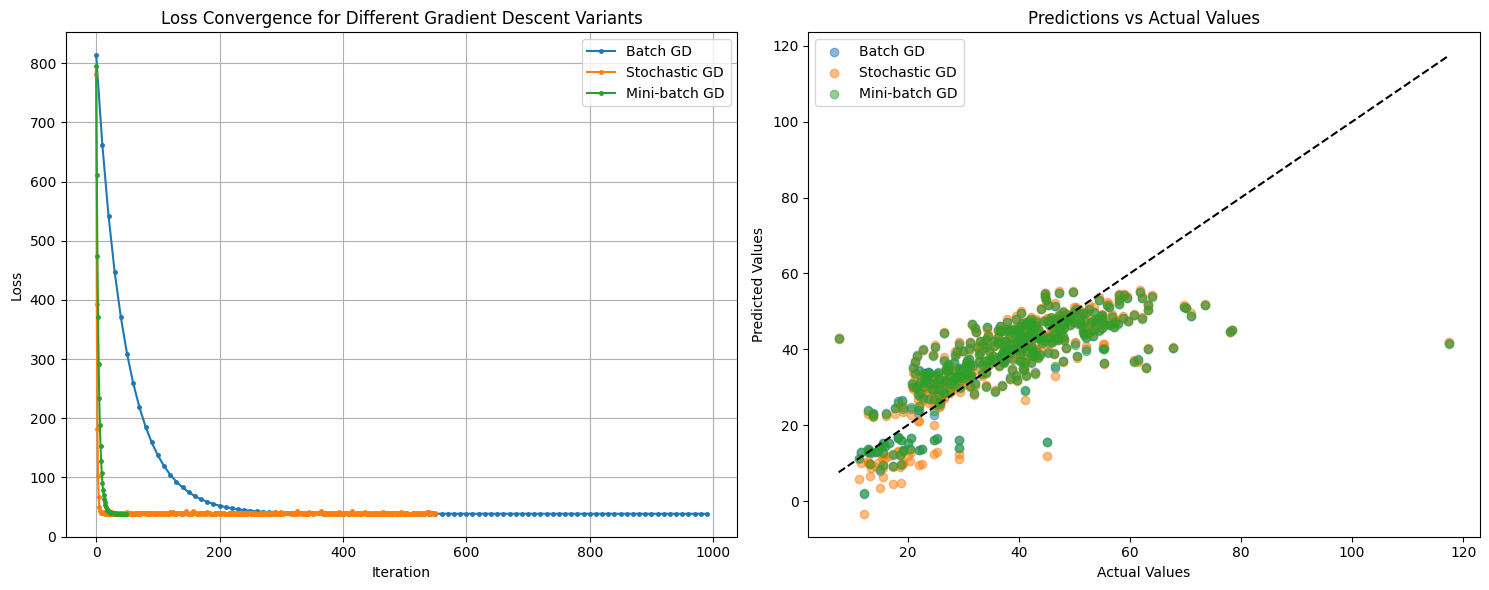


Final Weights:

Batch Gradient Descent:
Bias: 37.9786
Transaction Date: 1.4201
House Age: -3.0768
MRT Distance: -5.0457
Convenience Stores: 3.4537
Latitude: 2.9416
Longitude: 0.2550

Stochastic Gradient Descent:
Bias: 37.5319
Transaction Date: 1.1523
House Age: -3.2080
MRT Distance: -6.2455
Convenience Stores: 3.5266
Latitude: 3.0885
Longitude: 0.0609

Mini-batch Gradient Descent:
Bias: 37.9245
Transaction Date: 1.3996
House Age: -3.0718
MRT Distance: -4.6307
Convenience Stores: 3.5118
Latitude: 3.0257
Longitude: 0.5830

Final MSE:
Batch GD: 77.2231
Stochastic GD: 78.7297
Mini-batch GD: 77.3970


In [ ]:
def load_and_prepare_data():
    df = pd.read_csv('real_estate_valuation_data.csv')

    feature_columns = ['X1_transaction_date', 'X2_house_age', 'X3_distance_to_the_nearest_MRT_station',
                      'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude']

    X = df[feature_columns].values
    y = df['Y_house_price_of_unit_area'].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X = np.column_stack([np.ones(len(X)), X])

    return X, y

def batch_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m = len(y)
    n_features = X.shape[1]
    w = np.zeros(n_features)
    loss_history = []

    for i in range(num_iterations):
        predictions = X @ w

        gradients = (1/m) * X.T @ (predictions - y)

        w = w - learning_rate * gradients

        if i % 10 == 0:
            loss = np.sum((predictions - y) ** 2) / (2 * m)
            loss_history.append(loss)

    return w, loss_history

def stochastic_gradient_descent(X, y, learning_rate=0.01, num_epochs=50):
    m = len(y)
    n_features = X.shape[1]
    w = np.zeros(n_features)
    loss_history = []

    for epoch in range(num_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            prediction = X_shuffled[i] @ w

            gradients = X_shuffled[i] * (prediction - y_shuffled[i])

            w = w - learning_rate * gradients

            if i % (m//10) == 0:
                predictions = X @ w
                loss = np.sum((predictions - y) ** 2) / (2 * m)
                loss_history.append(loss)

    return w, loss_history

def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, num_epochs=50):
    m = len(y)
    n_features = X.shape[1]
    w = np.zeros(n_features)
    loss_history = []

    for epoch in range(num_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            predictions_batch = X_batch @ w

            gradients = (1/len(X_batch)) * X_batch.T @ (predictions_batch - y_batch)

            w = w - learning_rate * gradients

            if i % (m//10) == 0:
                predictions = X @ w
                loss = np.sum((predictions - y) ** 2) / (2 * m)
                loss_history.append(loss)

    return w, loss_history

def plot_results(X, y):
    print("Running Batch Gradient Descent...")
    w_bgd, loss_bgd = batch_gradient_descent(X, y)

    print("Running Stochastic Gradient Descent...")
    w_sgd, loss_sgd = stochastic_gradient_descent(X, y)

    print("Running Mini-batch Gradient Descent...")
    w_mbgd, loss_mbgd = mini_batch_gradient_descent(X, y)

    iterations_bgd = np.arange(0, 1000, 10)
    iterations_sgd = np.arange(len(loss_sgd))
    iterations_mbgd = np.arange(len(loss_mbgd))

    plt.figure(figsize=(15, 6))

    plt.subplot(121)
    plt.plot(iterations_bgd, loss_bgd, label='Batch GD', marker='.', markersize=5)
    plt.plot(iterations_sgd, loss_sgd, label='Stochastic GD', marker='.', markersize=5)
    plt.plot(iterations_mbgd, loss_mbgd, label='Mini-batch GD', marker='.', markersize=5)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Convergence for Different Gradient Descent Variants')
    plt.legend()
    plt.grid(True)

    plt.subplot(122)
    predictions_bgd = X @ w_bgd
    predictions_sgd = X @ w_sgd
    predictions_mbgd = X @ w_mbgd

    plt.scatter(y, predictions_bgd, alpha=0.5, label='Batch GD')
    plt.scatter(y, predictions_sgd, alpha=0.5, label='Stochastic GD')
    plt.scatter(y, predictions_mbgd, alpha=0.5, label='Mini-batch GD')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predictions vs Actual Values')
    plt.legend()

    plt.tight_layout()
    plt.show()

    feature_names = ['Bias', 'Transaction Date', 'House Age', 'MRT Distance',
                    'Convenience Stores', 'Latitude', 'Longitude']

    print("\nFinal Weights:")
    print("\nBatch Gradient Descent:")
    for name, weight in zip(feature_names, w_bgd):
        print(f"{name}: {weight:.4f}")

    print("\nStochastic Gradient Descent:")
    for name, weight in zip(feature_names, w_sgd):
        print(f"{name}: {weight:.4f}")

    print("\nMini-batch Gradient Descent:")
    for name, weight in zip(feature_names, w_mbgd):
        print(f"{name}: {weight:.4f}")

    mse_bgd = np.mean((predictions_bgd - y) ** 2)
    mse_sgd = np.mean((predictions_sgd - y) ** 2)
    mse_mbgd = np.mean((predictions_mbgd - y) ** 2)

    print("\nFinal MSE:")
    print(f"Batch GD: {mse_bgd:.4f}")
    print(f"Stochastic GD: {mse_sgd:.4f}")
    print(f"Mini-batch GD: {mse_mbgd:.4f}")

X, y = load_and_prepare_data()
plot_results(X, y)

## 3.

Create a Matplotlib animation of the contour plot.  
Each frame in the animation corresponds to a different iteration of gradient descent applied to the dataset to learn \( w_0 \) and \( w_1 \).

For each iteration:
- Plot the current value of \( w^{(t)} \) on the contour plot.
- Draw an arrow from \( w^{(t)} \) to \( w^{(t+1)} \), as updated by the gradient descent rule.
- Update the overall title of the plot to display the iteration number and convergence status.

Show the results of **Batch Gradient Descent, Stochastic Gradient Descent, and Mini-batch Gradient Descent** on the **same plot**.
Use a **legend** to distinguish between the three algorithms.

Analyze and comment on the behavior of different gradient descent algorithms based on the animation.


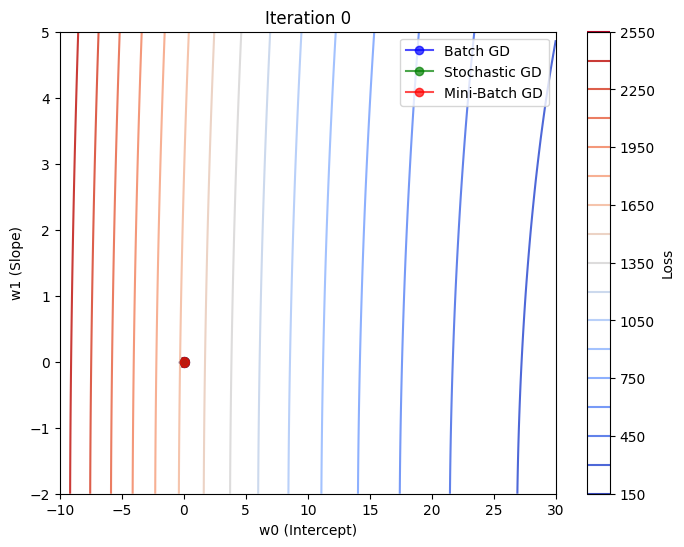

In [ ]:
df = pd.read_csv('real_estate_valuation_data.csv')

X = df[['X2_house_age']].values
y = df['Y_house_price_of_unit_area'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

def loss(w0, w1):
    predictions = w0 + w1 * X.flatten()
    return np.mean((y - predictions) ** 2)

w0_range = np.linspace(-10, 30, 100)
w1_range = np.linspace(-2, 5, 100)
W0, W1 = np.meshgrid(w0_range, w1_range)
Z = np.array([[loss(w0, w1) for w0 in w0_range] for w1 in w1_range])

def batch_gradient_descent(X, y, alpha, num_iterations):
    m = len(y)
    w0, w1 = 0, 0
    w_history = [(w0, w1)]
    loss_history = [loss(w0, w1)]
    for _ in range(num_iterations):
        predictions = w0 + w1 * X.flatten()
        error = predictions - y
        w0 -= alpha * (1/m) * np.sum(error)
        w1 -= alpha * (1/m) * np.sum(error * X.flatten())
        w_history.append((w0, w1))
        loss_history.append(loss(w0, w1))
    return w_history, loss_history

def stochastic_gradient_descent(X, y, alpha, num_epochs):
    m = len(y)
    w0, w1 = 0, 0
    w_history = [(w0, w1)]
    loss_history = [loss(w0, w1)]
    for _ in range(num_epochs):
        indices = np.random.permutation(m)
        for i in indices:
            prediction = w0 + w1 * X[i, 0]
            error = prediction - y[i]
            w0 -= alpha * error
            w1 -= alpha * error * X[i, 0]
            w_history.append((w0, w1))
            loss_history.append(loss(w0, w1))
    return w_history, loss_history

def mini_batch_gradient_descent(X, y, alpha, num_epochs, batch_size=32):
    m = len(y)
    w0, w1 = 0, 0
    w_history = [(w0, w1)]
    loss_history = [loss(w0, w1)]
    for _ in range(num_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            predictions = w0 + w1 * X_batch.flatten()
            error = predictions - y_batch
            w0 -= alpha * (1/len(X_batch)) * np.sum(error)
            w1 -= alpha * (1/len(X_batch)) * np.sum(error * X_batch.flatten())
            w_history.append((w0, w1))
            loss_history.append(loss(w0, w1))
    return w_history, loss_history

alpha = 0.01
num_iter = 100
num_epochs = 10

w_history_bgd, loss_history_bgd = batch_gradient_descent(X, y, alpha, num_iter)
w_history_sgd, loss_history_sgd = stochastic_gradient_descent(X, y, alpha, num_epochs)
w_history_mbgd, loss_history_mbgd = mini_batch_gradient_descent(X, y, alpha, num_epochs, batch_size=32)

fig, ax = plt.subplots(figsize=(8, 6))
CS = ax.contour(W0, W1, Z, 20, cmap='coolwarm')
plt.colorbar(CS, ax=ax, label='Loss')
ax.set_xlabel('w0 (Intercept)')
ax.set_ylabel('w1 (Slope)')
ax.set_title('Gradient Descent Optimization')

trajectories = [w_history_bgd, w_history_sgd, w_history_mbgd]
labels = ["Batch GD", "Stochastic GD", "Mini-Batch GD"]
colors = ['blue', 'green', 'red']

def animate(i):
    ax.clear()
    ax.set_xlim(w0_range.min(), w0_range.max())
    ax.set_ylim(w1_range.min(), w1_range.max())
    ax.set_xlabel('w0 (Intercept)')
    ax.set_ylabel('w1 (Slope)')
    ax.set_title(f'Iteration {i}')
    ax.contour(W0, W1, Z, 20, cmap='coolwarm')

    for traj, label, color in zip(trajectories, labels, colors):
        idx = min(i, len(traj) - 1)
        path = np.array(traj[:idx+1])
        ax.plot(path[:, 0], path[:, 1], color=color, marker='o', label=label, alpha=0.7)
        ax.scatter(path[-1, 0], path[-1, 1], color=color, s=50)
    ax.legend()

max_frames = max(len(w_history_bgd), len(w_history_sgd), len(w_history_mbgd))

anim = animation.FuncAnimation(fig, animate, frames=max_frames, interval=200)

HTML(anim.to_html5_video())

# anim.save("all_gradient_descent_methods.mp4", writer="ffmpeg")

# Question 3

Try to fit a linear model using mean absolute error (MAE) function instead of least squares (MSE).  
Randomly for 10 different values of \( y \), add a positive or negative number to make the data points outliers.  

Which loss function is more robust to outliers visually as well as quantitatively based on residual error:

for **MAE**:
$$ |y_i - h_w(x_i)| $$
for **MSE**:
$$ (y_i - h_w(x_i))^2 $$


$$
J(w) = \frac{1}{N} \sum_{i=1}^{N} \left| y^{(i)} - h_w(x^{(i)}) \right|
$$


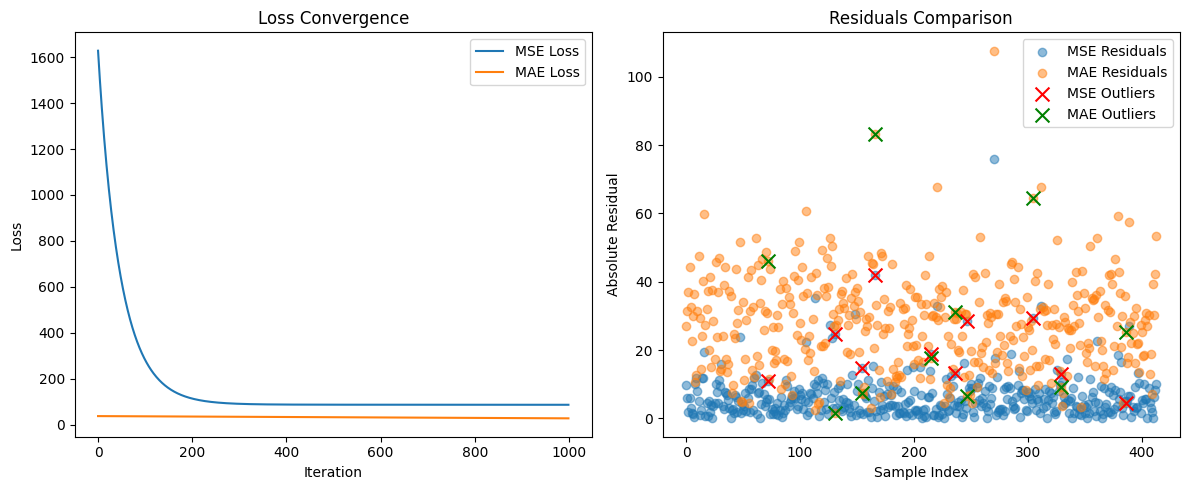


Quantitative Analysis:

MSE Model:
Overall Absolute Error: 6.4327
Overall Squared Error: 87.0871
MSE without outliers: 6.0969
MSE for outliers only: 20.0013

MAE Model:
Overall Absolute Error: 28.0476
Overall Squared Error: 967.7384
MAE without outliers: 28.0166
MAE for outliers only: 29.3012

Feature Weights:

MSE Model:
Bias: 37.7853
Transaction Date: 1.4179
House Age: -2.9130
MRT Distance: -5.0683
Convenience Stores: 3.5264
Latitude: 3.1439
Longitude: 0.3693

MAE Model:
Bias: 9.8625
Transaction Date: -0.0592
House Age: 0.0120
MRT Distance: -0.2177
Convenience Stores: 0.1678
Latitude: 0.2366
Longitude: 0.1423


In [ ]:
def load_and_prepare_data(add_outliers=False):
    df = pd.read_csv('real_estate_valuation_data.csv')

    feature_columns = ['X1_transaction_date', 'X2_house_age', 'X3_distance_to_the_nearest_MRT_station',
                      'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude']

    X = df[feature_columns].values
    y = df['Y_house_price_of_unit_area'].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X = np.column_stack([np.ones(len(X)), X])

    if add_outliers:
        np.random.seed(38)
        outlier_indices = np.random.choice(len(y), 10, replace=False)
        outlier_values = np.random.choice([-20, 20], 10)
        y[outlier_indices] += outlier_values

    return X, y, outlier_indices if add_outliers else None

def gradient_descent_mse(X, y, learning_rate=0.01, num_iterations=1000):
    m = len(y)
    n_features = X.shape[1]
    w = np.zeros(n_features)
    loss_history = []

    for _ in range(num_iterations):
        predictions = X @ w

        gradients = (1/m) * X.T @ (predictions - y)

        w = w - learning_rate * gradients

        loss = np.mean((predictions - y) ** 2)
        loss_history.append(loss)

    return w, loss_history

def gradient_descent_mae(X, y, learning_rate=0.01, num_iterations=1000):
    m = len(y)
    n_features = X.shape[1]
    w = np.zeros(n_features)
    loss_history = []

    for _ in range(num_iterations):
        predictions = X @ w

        errors = predictions - y
        gradients = (1/m) * X.T @ np.sign(errors)

        w = w - learning_rate * gradients

        loss = np.mean(np.abs(errors))
        loss_history.append(loss)

    return w, loss_history

def compute_residuals(X, y, w):
    predictions = X @ w
    absolute_residuals = np.abs(y - predictions)
    squared_residuals = (y - predictions) ** 2
    return absolute_residuals, squared_residuals

def analyze_and_visualize_results(X, y, outlier_indices):
    w_mse, loss_mse = gradient_descent_mse(X, y)
    w_mae, loss_mae = gradient_descent_mae(X, y)

    mse_abs_residuals, mse_sq_residuals = compute_residuals(X, y, w_mse)
    mae_abs_residuals, mae_sq_residuals = compute_residuals(X, y, w_mae)

    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(loss_mse, label='MSE Loss')
    plt.plot(loss_mae, label='MAE Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Convergence')
    plt.legend()

    plt.subplot(122)
    plt.scatter(range(len(y)), mse_abs_residuals, alpha=0.5, label='MSE Residuals')
    plt.scatter(range(len(y)), mae_abs_residuals, alpha=0.5, label='MAE Residuals')
    plt.scatter(outlier_indices, mse_abs_residuals[outlier_indices],
               color='red', marker='x', s=100, label='MSE Outliers')
    plt.scatter(outlier_indices, mae_abs_residuals[outlier_indices],
               color='green', marker='x', s=100, label='MAE Outliers')
    plt.xlabel('Sample Index')
    plt.ylabel('Absolute Residual')
    plt.title('Residuals Comparison')
    plt.legend()

    plt.tight_layout()
    plt.show()

    normal_indices = np.setdiff1d(np.arange(len(y)), outlier_indices)

    print("\nQuantitative Analysis:")
    print("\nMSE Model:")
    print(f"Overall Absolute Error: {np.mean(mse_abs_residuals):.4f}")
    print(f"Overall Squared Error: {np.mean(mse_sq_residuals):.4f}")
    print(f"MSE without outliers: {np.mean(mse_abs_residuals[normal_indices]):.4f}")
    print(f"MSE for outliers only: {np.mean(mse_abs_residuals[outlier_indices]):.4f}")

    print("\nMAE Model:")
    print(f"Overall Absolute Error: {np.mean(mae_abs_residuals):.4f}")
    print(f"Overall Squared Error: {np.mean(mae_sq_residuals):.4f}")
    print(f"MAE without outliers: {np.mean(mae_abs_residuals[normal_indices]):.4f}")
    print(f"MAE for outliers only: {np.mean(mae_abs_residuals[outlier_indices]):.4f}")

    feature_names = ['Bias', 'Transaction Date', 'House Age', 'MRT Distance',
                    'Convenience Stores', 'Latitude', 'Longitude']

    print("\nFeature Weights:")
    print("\nMSE Model:")
    for name, weight in zip(feature_names, w_mse):
        print(f"{name}: {weight:.4f}")

    print("\nMAE Model:")
    for name, weight in zip(feature_names, w_mae):
        print(f"{name}: {weight:.4f}")

X, y, outlier_indices = load_and_prepare_data(add_outliers=True)

analyze_and_visualize_results(X, y, outlier_indices)

MSE Model Observations:

MSE for outliers only: 20.0013 (much larger than its error without outliers)
MSE without outliers: 6.0969
The large difference indicates that outliers have a strong impact on the MSE model.
MAE Model Observations:

MAE for outliers only: 29.3012, which is close to its error without outliers (28.0166).
This small difference suggests that the MAE model is less affected by outliers.

Therefore, MAE is more robust to outliers.